## Definition & Importation

In [1]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft,ifft

def decoherence_rho():
    state1=np.array([1,0,0,0,0,1]);
    state1=qt.Qobj(state1).unit();
    state2=np.array([0,1,0,0,1,0]);
    state2=qt.Qobj(state2).unit();
    state3=np.array([0,0,1,1,0,0]);
    state3=qt.Qobj(state3).unit();

    decoherence_rho=state1*qt.dag(state1)/16+state2*qt.dag(state2)*5/16+state3*qt.dag(state3)*10/16;
    decoherence_rho=qt.mesolve(qt.spin_Jz(5/2),decoherence_rho,[0,np.pi*3/2]);
    decoherence_rho=decoherence_rho.states[1];
    return decoherence_rho

def phase_of(rho):
    state_up=np.array([1,0,0,0,0,0]);
    state_down=np.array([0,0,0,0,0,1]);
    state_up=qt.Qobj(state_up);
    state_down=qt.Qobj(state_down);
    
    phase1=qt.dag(state_up)*rho*state_up;
    phase2=qt.dag(state_down)*rho*state_down;
    phase1=np.absolute(phase1[0,0]);
    phase2=np.absolute(phase2[0,0])
    phase=(phase1-phase2)/(phase1+phase2);
    
    return phase

sigmax=qt.spin_Jx(5/2);
sigmay=qt.spin_Jy(5/2);
sigmaz=qt.spin_Jz(5/2);

## Main

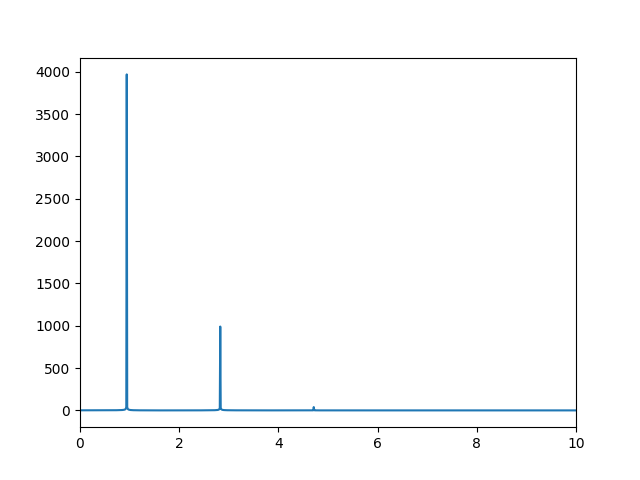

In [2]:
timelength=100;
timelist=np.array(np.linspace(0,2*timelength*np.pi,10000));
initial_rho=decoherence_rho();
state_solve=qt.mesolve(sigmaz,initial_rho,timelist);
final_pop=[0 for i in timelist];


for i in range(0,len(timelist)):
    precess_time=timelist[i];
    final_rho=qt.mesolve(sigmax,state_solve.states[i],[0,np.pi/2])
    final_pop[i]=phase_of(final_rho.states[1]);
    
%matplotlib ipympl

#plt.plot(timelist,final_pop);
f2=plt.figure();
plt.plot(timelist/timelength*15,np.abs(fft(final_pop)));
plt.xlim([0,10]);